# SV Distribution
## How to measure distribution of SVs
Notes: 
Need to get X,Y coordinates of ROI pixels, as well as AZline pixels
1. Figure out how to get ROI data into Python! Line needs to be a list of pixel coordinates

    -Open synapse image. Open SV rois and PM rois. Draw a line for the AZ (PM_straightL end to PM_straightR end)
    
    -Select your AZ line-->File-->Save as...-->XY Coordinates. Save in Syn__ folder as Syn__AZ. 
    
     -This file is a list of all coordinates on your line but NOT in pixels yet. 

Synapses where this distance code may be a problem:

* Syn09

* Syn20

* Syn25

* Syn27

* Syn40

In [17]:
#Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#Standard distance formula
def distance(v,p):
    return np.sqrt((v[0]-p[0])**2 +(v[1]-p[1])**2)

#import V and L
V = np.array(pd.read_table("V.txt", header=None, delimiter=" "))
L = np.array(pd.read_table("L.txt", header=None, delimiter=" "))

min_dist= []
for v in V:
    d_v = []
    for p in L:
        d_v.append(distance(v,p))
    min_dist.append(np.min(d_v))

In [18]:
#Turn your pixel distance into an array and multiply it by the pixel/nm scale to get distance in nm
SVdistances = np.array(min_dist)/0.27

In [19]:
SVdistances

array([634.41536333, 563.55962533, 258.96809047, 195.70140465,
       519.58884241, 418.04299436, 676.41027801, 818.47662035,
       499.89024859, 488.95902976, 472.71216414, 412.59325753,
       272.4929367 , 501.35618545, 335.58907526, 649.67017062,
       753.3100255 , 259.28571294, 727.66232238, 463.3331853 ,
       391.28012622, 264.10809609, 333.4156277 , 600.43422787,
       672.83157771, 225.31794332, 511.96922061, 394.33575272,
        56.41313412, 744.89575412, 635.97025234, 508.06931685,
       641.38267993, 137.8355116 , 706.23327031, 568.40691389,
       481.90864242, 606.69560823, 457.23868533, 480.98264758,
       699.215708  , 528.1252917 , 627.93890645, 443.11529649,
       487.14616437, 570.38239526, 354.51235852, 603.1694978 ,
       554.72777837, 472.82822409, 357.47936332, 371.20276831,
       470.41411287, 544.89777046, 286.21746795, 792.00742311,
       454.81722764, 494.09406367, 406.05837255, 125.76242108,
       455.08858933, 185.22221852, 469.72834574, 427.86

In [20]:
#to check, get L and V for Syn76, and check mean
np.mean(SVdistances)

446.9328279447016

(array([ 3.,  5.,  2.,  7.,  2.,  9.,  7.,  5., 13., 10.,  8.,  8., 12.,
         9., 11., 17., 16., 18., 14., 10., 10., 12.,  8.,  6.,  6.,  3.,
         4.,  4.,  0.,  1.]),
 array([ 31.42696805,  59.53638366,  87.64579927, 115.75521488,
        143.8646305 , 171.97404611, 200.08346172, 228.19287733,
        256.30229294, 284.41170855, 312.52112416, 340.63053977,
        368.73995538, 396.84937099, 424.9587866 , 453.06820221,
        481.17761782, 509.28703343, 537.39644904, 565.50586466,
        593.61528027, 621.72469588, 649.83411149, 677.9435271 ,
        706.05294271, 734.16235832, 762.27177393, 790.38118954,
        818.49060515, 846.60002076, 874.70943637]),
 <a list of 30 Patch objects>)

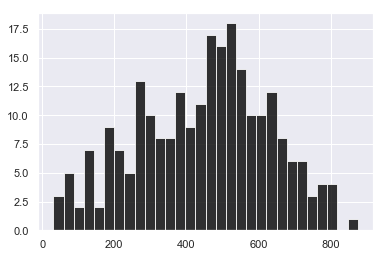

In [25]:
black, gray = ((0, 0, 0), (0.6, 0.6, 0.6))
plt.hist(SVdistances, bins=30, color=black, alpha=0.8)